# Exploratory Data Analysis Exercise
* For this part we will be using the `data/cars.csv` dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline 
import scipy.stats as stats

# Load in the data
* Use the file in the data folder called 'cars.csv'
* Save it as a varible named 'df'
* Display the first 5 rows of our dataframe

In [2]:
# Load data

df = pd.read_csv('data/cars.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Vehicle Size       11914 non-null  object 
 10  Vehicle Style      11914 non-null  object 
 11  highway MPG        11914 non-null  int64  
 12  city mpg           11914 non-null  int64  
 13  Popularity         11914 non-null  int64  
 14  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 1.4+ MB


In [4]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [5]:
df['Make'].value_counts()

Chevrolet        1123
Ford              881
Volkswagen        809
Toyota            746
Dodge             626
Nissan            558
GMC               515
Honda             449
Mazda             423
Cadillac          397
Mercedes-Benz     353
Suzuki            351
BMW               334
Infiniti          330
Audi              328
Hyundai           303
Volvo             281
Subaru            256
Acura             252
Kia               231
Mitsubishi        213
Lexus             202
Buick             196
Chrysler          187
Pontiac           186
Lincoln           164
Oldsmobile        150
Land Rover        143
Porsche           136
Saab              111
Aston Martin       93
Plymouth           82
Bentley            74
Ferrari            69
FIAT               62
Scion              60
Maserati           58
Lamborghini        52
Rolls-Royce        31
Lotus              29
Tesla              18
HUMMER             17
Maybach            16
Alfa Romeo          5
McLaren             5
Spyker    

# Data clean up part 1.

1. Print the number of duplicate rows we have in our dataframe.

2. Modify our df to have all duplicate rows removed. 

3. Do a sanity check to make sure all duplicates have been removed by printing the total number of duplicate rows again.

In [3]:
# 1. Print the number of duplicate rows we have in our dataframe.
print(df.duplicated(), '\n')      #rertun a boolean list list 

print("\nTotal total duplicated row: ", df.duplicated().sum())

0        False
1        False
2        False
3        False
4        False
         ...  
11909    False
11910    False
11911    False
11912    False
11913    False
Length: 11914, dtype: bool 


Total total duplicated row:  720


In [4]:
#  2. Modify our df to have all duplicate rows removed. 

df = df.drop_duplicates()

In [5]:
# 3. Do a sanity check to make sure all duplicates have been removed by printing the total number of duplicate rows again.
print("New duplicate count: ", df.duplicated().sum())

New duplicate count:  0


# Data clean up part 2.
* Which column has the most null values and how many null values does it have?
* Print how long our dataframe is.
* Remove any row that has a null value in it. 
* Do a sanity check and pring how long our dataframe is now that we have removed our null values.

In [6]:
# * Which column has the most null values and how many null values does it have?

df.isnull().sum().sort_values(ascending=False)    #Question: sum vs count. why not count? 

Engine HP            69
Engine Cylinders     30
Number of Doors       6
Engine Fuel Type      3
Make                  0
Model                 0
Year                  0
Transmission Type     0
Driven_Wheels         0
Vehicle Size          0
Vehicle Style         0
highway MPG           0
city mpg              0
Popularity            0
MSRP                  0
dtype: int64

In [10]:
# * Print how long our dataframe is.
df.shape

(11194, 15)

In [7]:
# * Remove any row that has a null value in it. 
df = df.dropna()

In [8]:
# * Do a sanity check and pring how long our dataframe is now that we have removed our null values.
print("Row count: ", df.shape[0])
print("\nNull Count:\n",df.isnull().sum())


Row count:  11092

Null Count:
 Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64


### Make a bar chart that displays how many times each brand of car appears in this data. 
_Brand of car is the `Make` of the car._
* You can achieve this by using value_counts or by a groupby.  Either is fine with me. 

<AxesSubplot:xlabel='Year', ylabel='Make'>

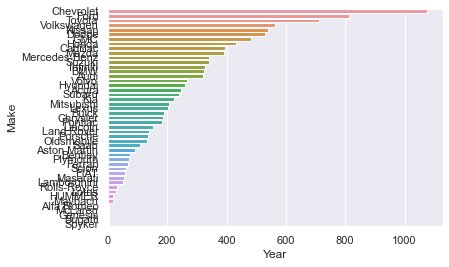

In [28]:
# Make a bar chart that displays how many times each brand of car appears in this data. 

#Method 1: 
car_count = df.value_counts('Make')

# Method 2: 
gbo = df.groupby('Make')
car_count = gbo['Year'].count().sort_values(ascending= False)
car_count = pd.DataFrame(car_count).reset_index()

#Method-2
sns.barplot(data=car_count, x="Year", y="Make") #Question: sns barplot doesn't work here with the series data. What is the work around?
#car_count.head()

<AxesSubplot:ylabel='Make'>

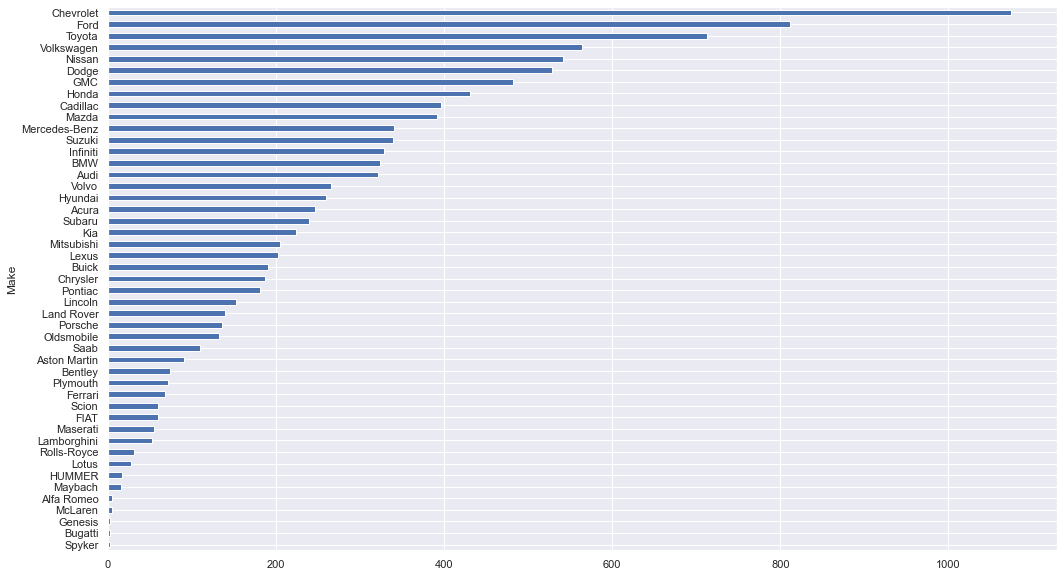

In [14]:
# Make the cart more legible, by making it a horizontal bar chart, sorting the values, and changing the figure size.

car_count_sorted = car_count.sort_values(ascending= True)
car_count_sorted.plot(kind="barh", figsize=(17,10))

# Make a timeline line chart in which the x-axis is the year, and the y-axis is the average MSRP.
* What's noticeable about it and what do you think the error is...


[Text(0, 0.5, 'Average MSRP')]

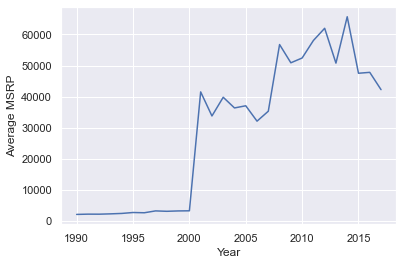

In [15]:
# Make a timeline line chart in which the x-axis is the year, and the y-axis is the average MSRP.

gbo = df.groupby('Year')
average_msrp = gbo['MSRP'].mean()

ax = sns.lineplot(data=average_msrp)
ax.set(ylabel="Average MSRP")

# It seems as though in the years before (and includig) 2000, they were counting in tens.
Make a new column that is called `adjusted_price`, that contains all prices, however, for every year before 2000 make it 10x the original MSRP.  
   * Hint; you might need to use our old friend `np.where`

In [17]:
# Make a column where is 10 when year is less than 2000, else 1.
year_before_2001 = df['Year'] <= 2000 
df["price_adjuster"] = np.where(year_before_2001, 10, 1)

# Multiply the MSRP by the price adjuster.
df["adjusted_price"] = df["MSRP"] * df['price_adjuster']

# Replot the new adjusted price.  
* Make the y-axis start at 0 and go up to 100,000

[Text(0, 0.5, 'Average MSRP'), (0.0, 100000.0)]

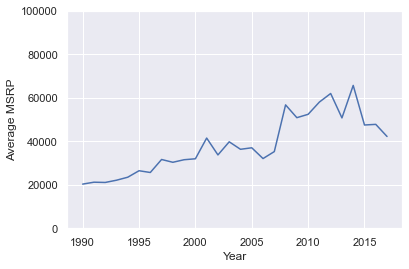

In [18]:
# Plot new prices
gbo = df.groupby('Year')
average_msrp = gbo['adjusted_price'].mean()

ax = sns.lineplot(data=average_msrp)
ax.set(ylabel="Average MSRP", ylim = (0,100000))

In [19]:
df[year_before_2001]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,price_adjuster,adjusted_price
17,Audi,100,1992,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Midsize,Sedan,24,17,3105,2000,10,20000
19,Audi,100,1992,regular unleaded,172.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,Wagon,20,16,3105,2000,10,20000
21,Audi,100,1992,regular unleaded,172.0,6.0,MANUAL,all wheel drive,4.0,Midsize,Sedan,21,16,3105,2000,10,20000
22,Audi,100,1993,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Midsize,Sedan,24,17,3105,2000,10,20000
23,Audi,100,1993,regular unleaded,172.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,Wagon,20,16,3105,2000,10,20000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11794,Subaru,XT,1991,regular unleaded,145.0,6.0,MANUAL,all wheel drive,2.0,Compact,Coupe,23,16,640,2000,10,20000
11832,GMC,Yukon Denali,2000,regular unleaded,255.0,8.0,AUTOMATIC,four wheel drive,4.0,Large,4dr SUV,15,11,549,3949,10,39490
11881,BMW,Z3,2000,regular unleaded,193.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,24,17,3916,4976,10,49760
11882,BMW,Z3,2000,regular unleaded,193.0,6.0,MANUAL,rear wheel drive,2.0,Compact,2dr Hatchback,24,17,3916,4697,10,46970


# What are top 5 car makers that make the most expensive cars on average. 
* I only want the top 5, make sure your answer is the top 5 and only the top 5. (hint, you can use .head())
* Use our `adjusted_price` column for this
* Hint; you're going to have to do a .groupby to answer this.

In [20]:
# What are the top 5 car makers make the most expensive cars on average. 

gbo = df.groupby('Make')

average_car_price = gbo["adjusted_price"].mean().sort_values(ascending=False)
average_car_price.head()


Make
Bugatti        1.757224e+06
Maybach        5.462219e+05
Rolls-Royce    3.511306e+05
Lamborghini    3.315673e+05
Bentley        2.471693e+05
Name: adjusted_price, dtype: float64

# What are the 5 car makers that have the highest median highway MPG?

In [21]:
# Which car makers have the highest median highway MPG?

highest_med_hw_mpg = gbo['highway MPG'].mean().sort_values(ascending= False)

highest_med_hw_mpg.head()

Make
Alfa Romeo    34.000000
FIAT          33.915254
Scion         32.300000
Honda         32.062645
Volkswagen    32.015957
Name: highway MPG, dtype: float64

# Using `sns.histplot`, make histogram of the adjusted_price of just these car makers.
* ['Chevrolet', 'Ford', 'Toyota']
* Create a temp_df to store the dataframe of just these values.
* Set the 'hue='Make''.

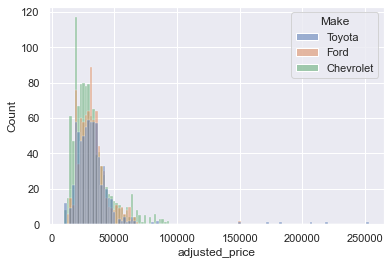

In [22]:
# Using `sns.histplot`, make histogram of the adjusted_price of just these car makers.
selected_make = ['Chevrolet', 'Ford', 'Toyota']

condition = df.Make.isin(selected_make)
temp_df = df[condition]

ax = sns.histplot(data=temp_df, x="adjusted_price", hue="Make")

# Remake the same histogram, but limit the x-axis from 0 to 100,000

[(0.0, 100000.0)]

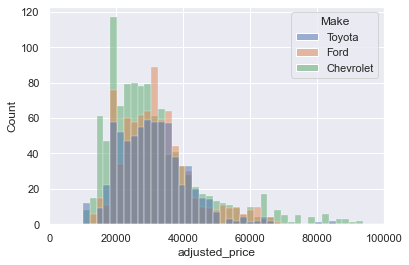

In [23]:
# Remake the same histogram, but limit the x-axis from 0 to 100,000
ax = sns.histplot(data=temp_df, x="adjusted_price", hue="Make")
ax.set(xlim=(0,100000))


# Plot the relationship between Engine HP and highway MPG

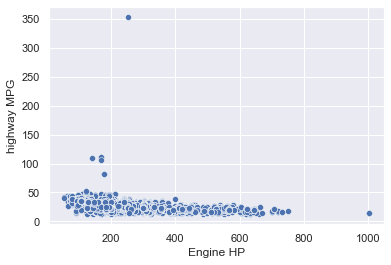

In [24]:
# Plot the relationship between Engine HP and highway MPG
ax = sns.scatterplot(data=df, x="Engine HP", y="highway MPG")


# Using `sns.boxplot`, create a boxplot for the 'Engine HP'

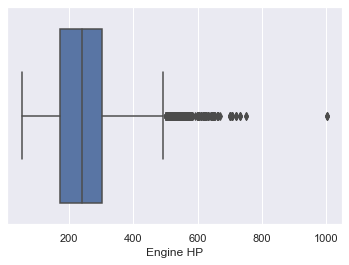

In [25]:
# create a boxplot for the 'Engine HP'
ax = sns.boxplot(data= df, x='Engine HP')


# Make another boxplot for highway MPG

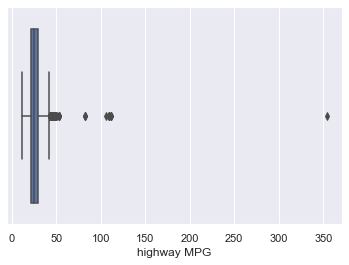

In [26]:
# create a boxplot for the 'highway MPG'
ax = sns.boxplot(data=df, x="highway MPG")

# Remove any  outliers from Engine HP and highway MPG 

<img src='https://miro.medium.com/max/1400/1*2c21SkzJMf3frPXPAR_gZA.png' width=500>

* Outliers meaning values that are outside 1.5x the Inter Quartile Range (see image above).
* For each column (Engine HP and highway MPG):
* Calculate the 0.25 and 0.75 Quantiles
* Calculate the Inter Quartile Range (IQR)
* Create condition mask for the values that are outliers below (in the 'Minimum' range).
* Create condition mask for the values that are outliers above (in the 'Maximum' range).
* Filter the dataframe to remove any values that are in the above section _OR_ the below section. (hint; it may be easier to use the inverse selection '~'.
* Make the same boxplots of Engine HP and Highway MPG as before but with the this dataframe.

In [39]:
# Remove any  outliers from Engine HP and highway MPG 


Q1 = df['Engine HP'].quantile(0.25)
Q3 = df['Engine HP'].quantile(0.75) 
IQR = Q3-Q1

outliers_below = df['Engine HP'] < (Q1 - 1.5 *IQR)
outliers_above = df['Engine HP'] > (Q3 + 1.5 *IQR)

omit_outliers_engine = df[ ~(outliers_above | outliers_below) ]

In [40]:
Q1 = df['highway MPG'].quantile(0.25)
Q3 = df['highway MPG'].quantile(0.75) 
IQR = Q3-Q1

outliers_below = df['highway MPG'] < (Q1 - 1.5 *IQR)
outliers_above = df['highway MPG'] > (Q3 + 1.5 * IQR)

omit_outliers_engine_highway = df[ ~(outliers_above | outliers_below) ]

# Remake the boxplots for both Engine HP and highway MPG


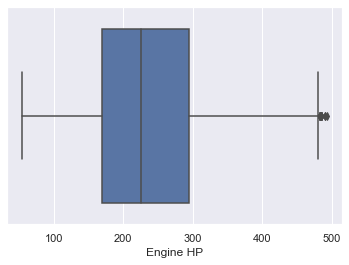

In [41]:
# Engine HP boxplot
ax = sns.boxplot(data= omit_outliers_engine, x='Engine HP')

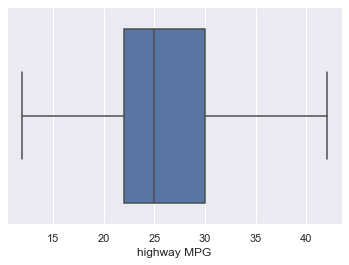

In [42]:
# highway MPG boxplot

ax = sns.boxplot(data= omit_outliers, x='highway MPG')

# Make a scatter plot of Engine HP vs highway MPG

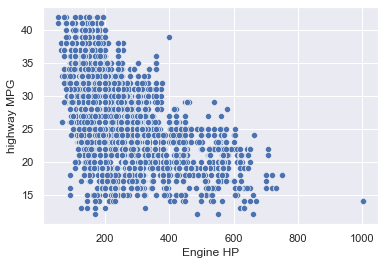

In [43]:
# Make a scatter plot of Engine HP vs highway MPG
ax = sns.scatterplot(data=omit_outliers_engine_highway, x='Engine HP', y='highway MPG')

# What does this plot tell you about how Engine HP affects highway MPG?

In [34]:
# What does this plot tell you about how Engine HP affects highway MPG?

print('Engine HP and highway MPG seem to have a negative relationship. Higher HP cars require more fuel to run, thus give less milage per gallon.')

Your answer here.


# Using a pairplot, display all of the linear relationship.
* Which variables look like they have the strongest linear relationship (Besides MSRP and adjusted_price).

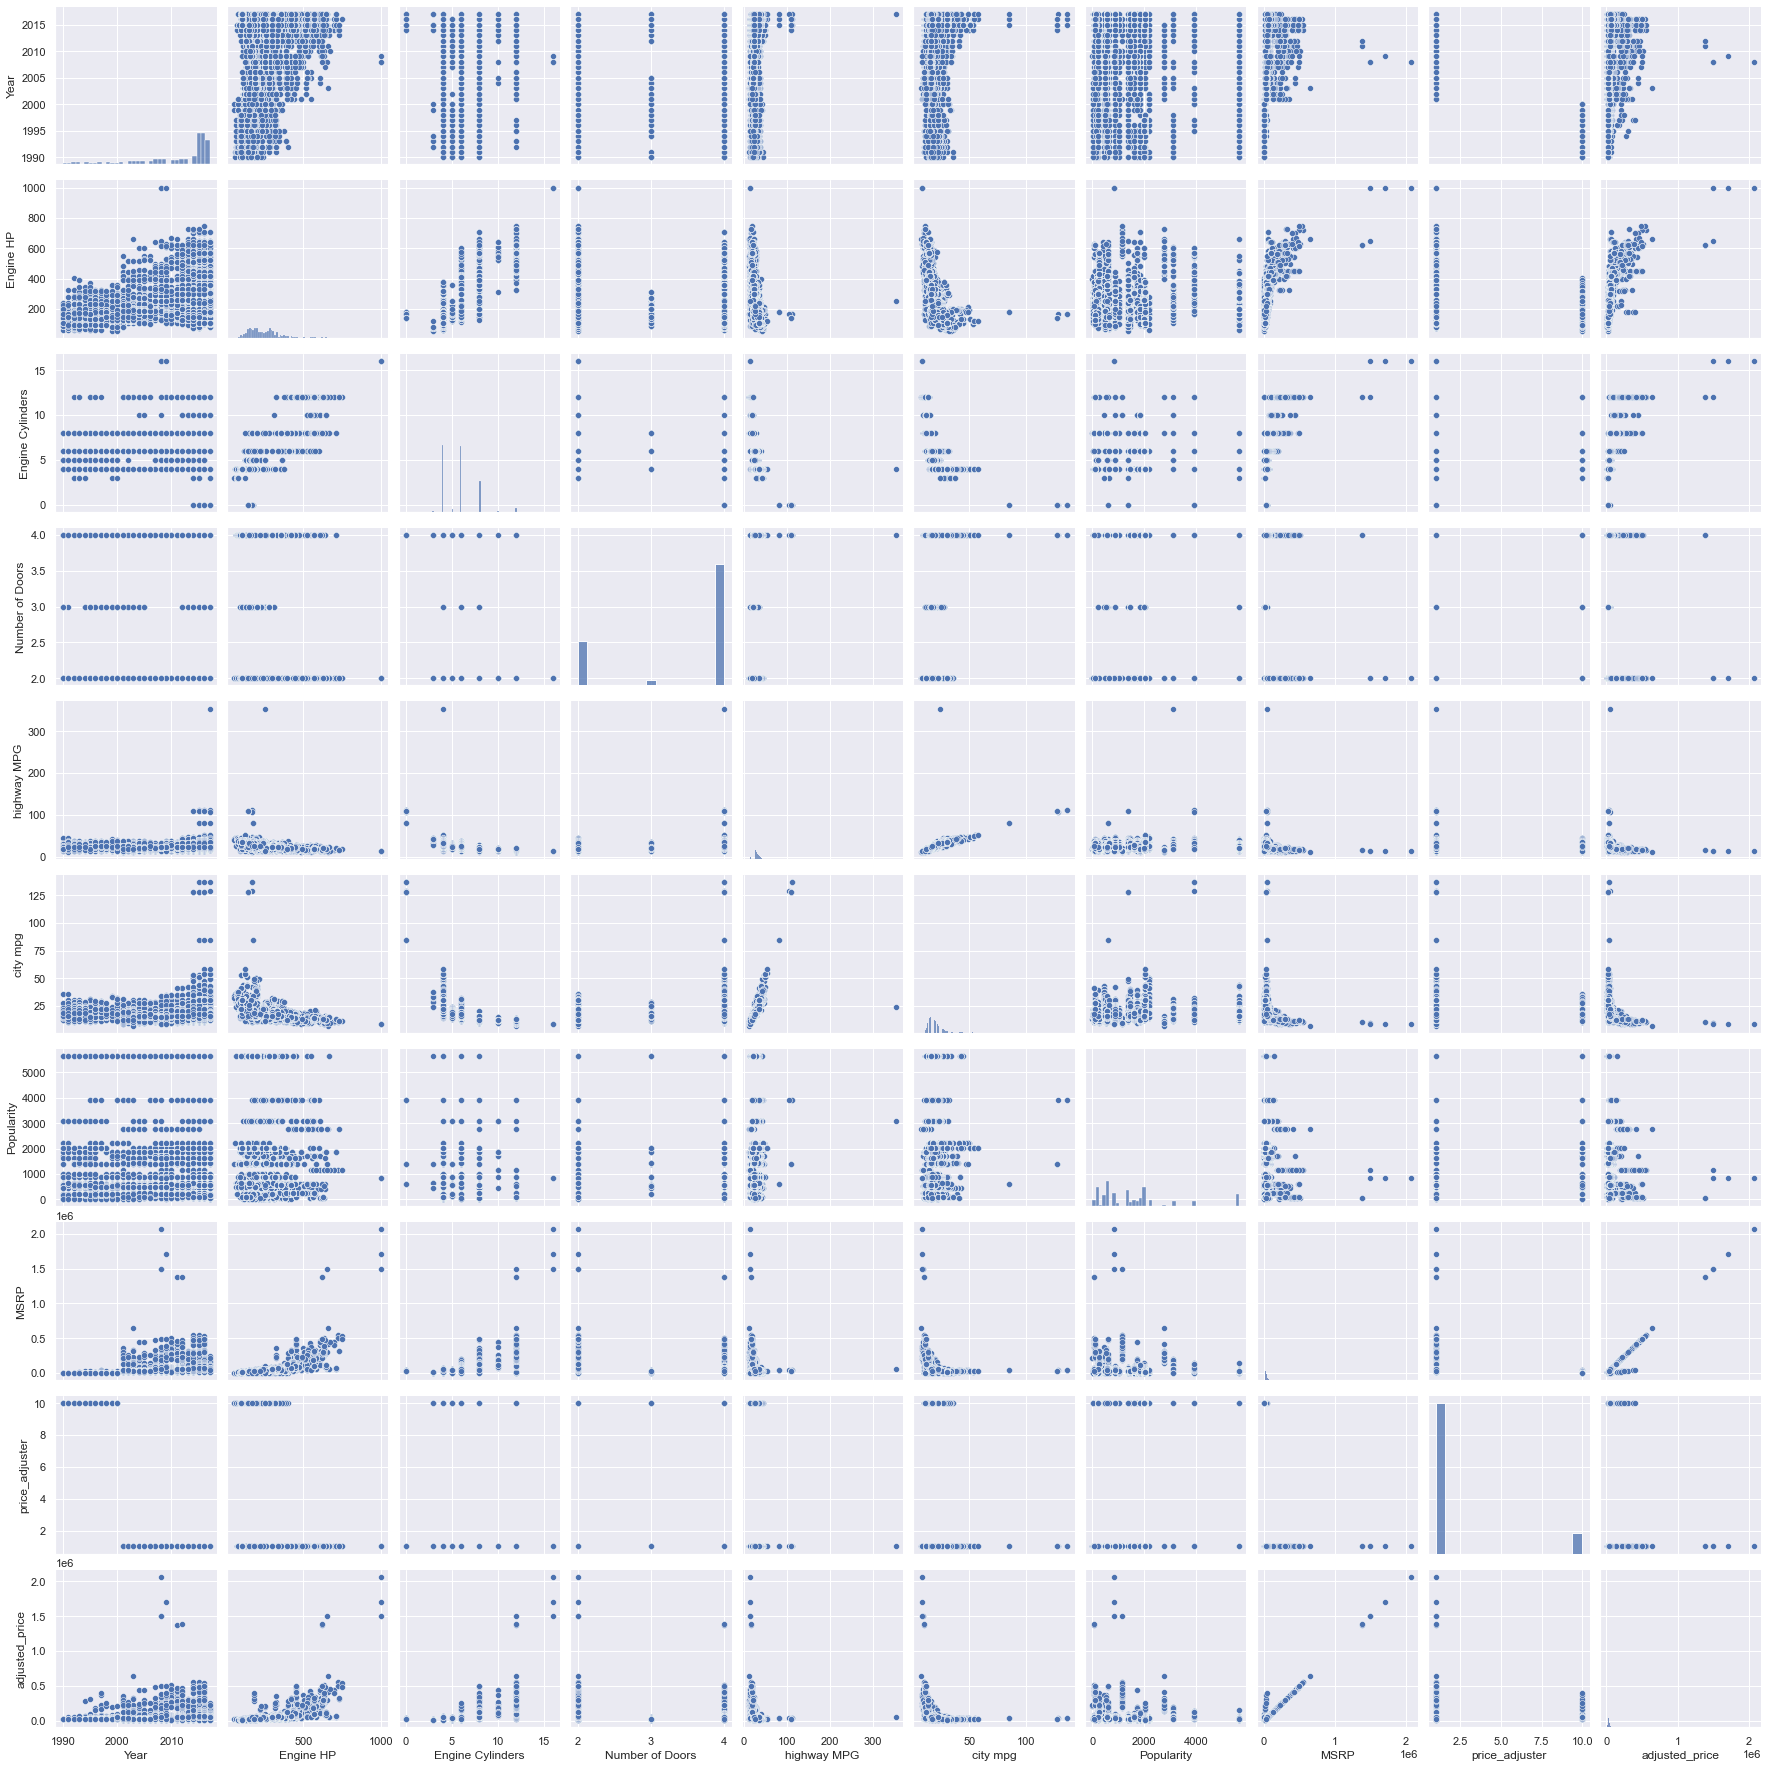

In [62]:
# Using a pairplot, display all of the linear relationship.
sns.pairplot(df);


In [31]:
# * Which variables look like they have the strongest linear relationship (Besides MSRP and adjusted_price).
print("Engine HP and Engine Cylinders have a strong positive relationship")
print("Engine HP and Year also have a strong positive relationship"")


# Find which features actually have the strongest linear relationship using correlations.
* Make a heatmap plot of all of the correlations in our dataset.
* Change the figure size of our heatmap plot to be 8x8
* __Which feature does Engine HP have the strongest relationship with, and why do you think that relationship exists.__

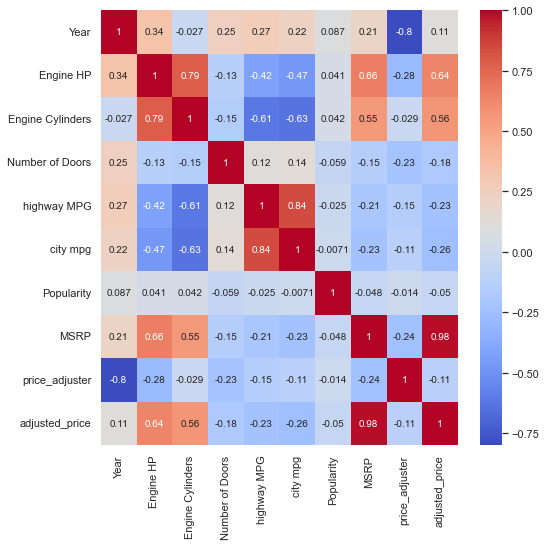

In [44]:
# * Make a heatmap plot of all of the correlations in our dataset.
# * Change the figure size of our heatmap plot to be 8x8
fig, ax = plt.subplots(figsize=(8, 8))
ax = sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

In [50]:
# Which feature does Engine HP have the strongest relationship with, and why do you think that relationship exists.

print('Engine HP has the strongest relationship with the Engine Cylinders.') 
print('This is because, the more engine cyliders you have, the more power your car will output.')

Engine HP has the strongest relationship with the Engine Cylinders.
This is because, the more engine cyliders you have, the more power your car will output.


# [EXTRA CREDIT] 
* In the column names, replace all the spaces with an underscore, and make them all lowercase as well


In [80]:
# * In the column names, replace all the spaces with an underscore, and make them all lowercase as well
column_list = list(df.columns)

def column_modify(column_list):
    result = [] 
    for column in column_list:
        col = column.lower().split(" ")
        add_underscore = "_".join(col)
        result.append(add_underscore)
    return result

column_list = column_modify(column_list)
df.columns = column_list
    
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500
